In [7]:
# Basic Python libraries
import pandas as pd
import numpy as np

# For visualization (optional in Milestone 1)
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Replace 'path_to_dataset.csv' with the actual CSV file path
df = pd.read_csv(r"C:\Users\deepu\Downloads\archive (1).zip")


# Display first 5 rows
df.head()


,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [12]:
# Check the shape of dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Basic info about columns and data types
df.info()

# Check for null values
df.isnull().sum()


Dataset Shape: (1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Resume_ID                   0
Name                        0
Skills                      0
Experience (Years)          0
Education                   0
Certifications            274
Job Role                    0
Recruiter Decision          0
Salary Expectation ($)      0
Projects Count              0
AI Score (0-100)            0
dtype: int64

In [13]:
# Quick descriptive statistics for numeric columns
df.describe()


,Resume_ID,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100)
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,4.896000,79994.486000,5.13300,83.950000
std,288.819436,3.112695,23048.472549,3.23137,20.983036
min,1.000000,0.000000,40085.000000,0.00000,15.000000
25%,250.750000,2.000000,60415.750000,2.00000,70.000000
50%,500.500000,5.000000,79834.500000,5.00000,100.000000
75%,750.250000,8.000000,99583.250000,8.00000,100.000000
max,1000.000000,10.000000,119901.000000,10.00000,100.000000


In [15]:
# List all column names to see the exact spelling
print(df.columns)


Index(['Resume_ID', 'Name', 'Skills', 'Experience (Years)', 'Education',
       'Certifications', 'Job Role', 'Recruiter Decision',
       'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)'],
      dtype='object')


In [16]:
# Replace 'Job Role' with the exact column name from df.columns
print(df['Job Role'].unique())


['AI Researcher' 'Data Scientist' 'Cybersecurity Analyst'
 'Software Engineer']


In [17]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Now access like this
print(df['job_role'].unique())


['AI Researcher' 'Data Scientist' 'Cybersecurity Analyst'
 'Software Engineer']


In [18]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 resume_id                   0
name                        0
skills                      0
experience_(years)          0
education                   0
certifications            274
job_role                    0
recruiter_decision          0
salary_expectation_($)      0
projects_count              0
ai_score_(0-100)            0
dtype: int64


In [19]:
# Check missing values specifically for education and job_role
print("Missing Education entries:", df['education'].isnull().sum())
print("Missing Job Role entries:", df['job_role'].isnull().sum())


Missing Education entries: 0
Missing Job Role entries: 0


In [20]:
# Unique values in education
print("Unique Educational Backgrounds:")
print(df['education'].unique())

# Unique values in job_role
print("\nUnique Job Roles:")
print(df['job_role'].unique())


Unique Educational Backgrounds:
['B.Sc' 'MBA' 'B.Tech' 'PhD' 'M.Tech']

Unique Job Roles:
['AI Researcher' 'Data Scientist' 'Cybersecurity Analyst'
 'Software Engineer']


In [21]:
# Count of candidates per education type
edu_counts = df['education'].value_counts()
print("Number of candidates per education:\n", edu_counts)

# Count of candidates per job role
job_counts = df['job_role'].value_counts()
print("\nNumber of candidates per job role:\n", job_counts)


Number of candidates per education:
 education
B.Sc      205
MBA       202
B.Tech    200
M.Tech    198
PhD       195
Name: count, dtype: int64

Number of candidates per job role:
 job_role
AI Researcher            257
Data Scientist           255
Cybersecurity Analyst    255
Software Engineer        233
Name: count, dtype: int64


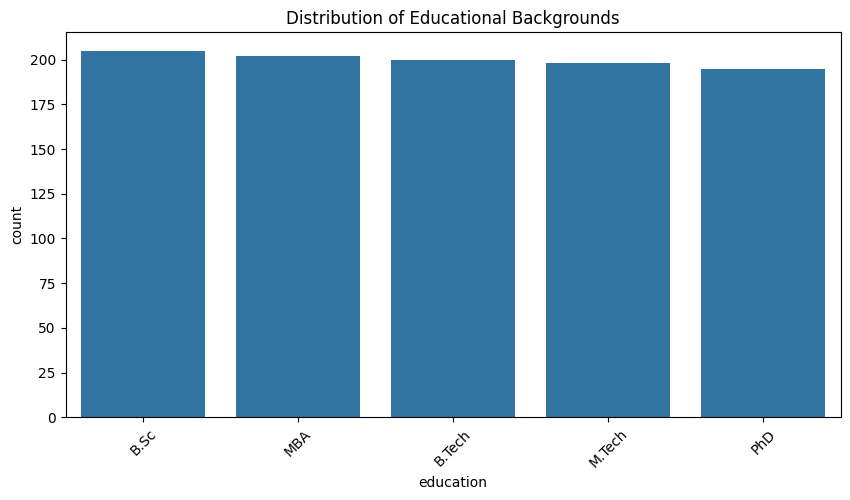

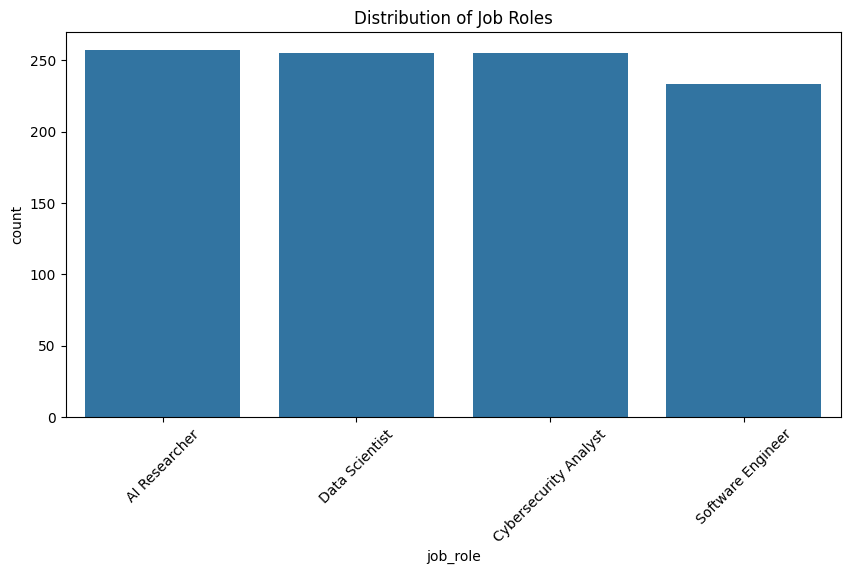

In [22]:
# Bar plot for education
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Educational Backgrounds")
plt.show()

# Bar plot for job roles
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='job_role', order=df['job_role'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Job Roles")
plt.show()


In [23]:
# Save a version of dataset with cleaned column names for future Milestone 2
df.to_csv('milestone1_cleaned_columns.csv', index=False)
